# EDA on API Results

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
# Load combined API data (API results has been combined in API_Calls notebook)
df=pd.read_csv('Data/tmdb_results_combined.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2656 non-null   object 
 1   adult                  2654 non-null   float64
 2   backdrop_path          1543 non-null   object 
 3   belongs_to_collection  222 non-null    object 
 4   budget                 2654 non-null   float64
 5   genres                 2654 non-null   object 
 6   homepage               213 non-null    object 
 7   id                     2654 non-null   float64
 8   original_language      2654 non-null   object 
 9   original_title         2654 non-null   object 
 10  overview               2596 non-null   object 
 11  popularity             2654 non-null   float64
 12  poster_path            2414 non-null   object 
 13  production_companies   2654 non-null   object 
 14  production_countries   2654 non-null   object 
 15  rele

In [4]:
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1243.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


## Number of movies has at least some valid financial information

In [5]:
# Slice out movies with finacial information
df_financial=df[(df['budget']>0) | (df['revenue']>0)]
df_financial.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1243.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


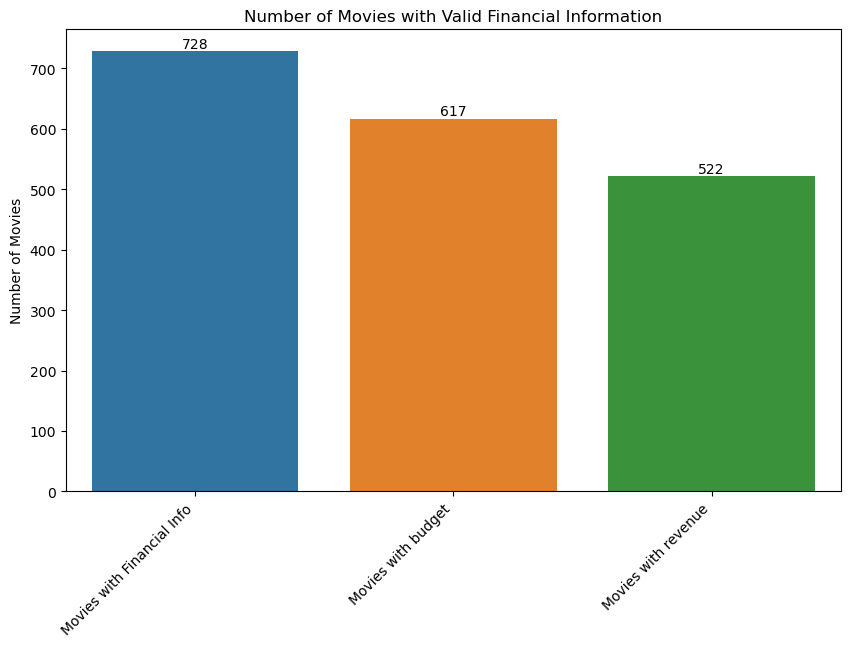

In [12]:
df_budget= df[df['budget'] > 0]
df_revenue=df[df['revenue']>0]
# Count the number of movies with valid financial information
movies_with_financial_info = len(df_financial)
movies_with_budget=len(df_budget)
movies_with_revenue=len(df_revenue)
# Create a bar chart
fi,ax = plt.subplots(figsize=(10,6))
sns.barplot(x=['Movies with Financial Info','Movies with budget','Movies with revenue'], 
            y=[movies_with_financial_info,movies_with_budget,movies_with_revenue])
ax.set_title('Number of Movies with Valid Financial Information')
ax.set_ylabel('Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.bar_label(ax.containers[0]);

In [7]:
print(f'There are {len(df_financial)} movies had at lease some valid financial information')

There are 728 movies had at lease some valid financial information


## Number of movies by certification categories

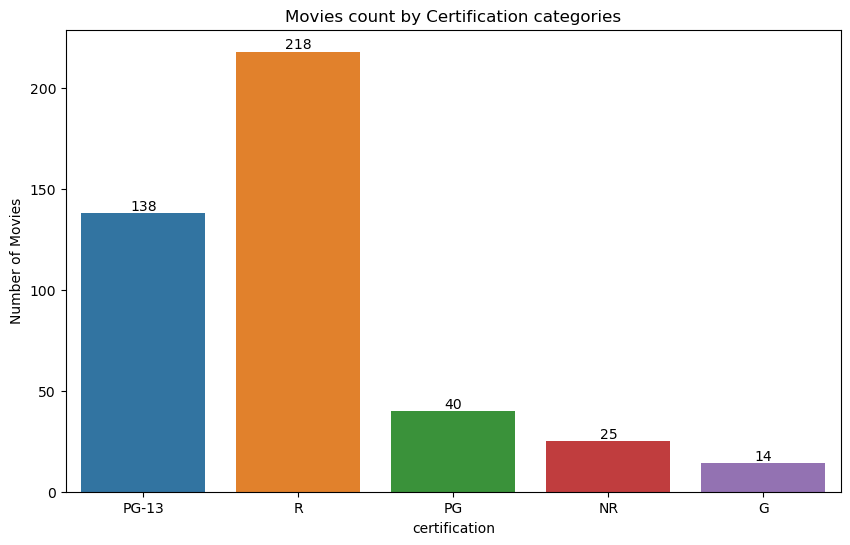

In [13]:
fi,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df_financial,x='certification',ax=ax)
ax.set_title('Movies count by Certification categories')
ax.set_ylabel('Number of Movies')
ax.bar_label(ax.containers[0]);

- Number of movies in each of the certification categories shown above

## Average revenue per certification category

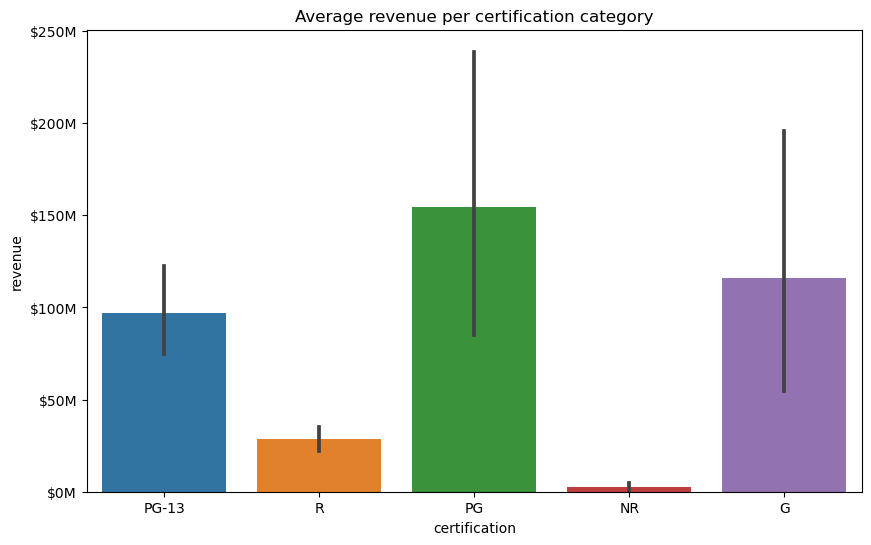

In [23]:
fi,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_financial,x='certification',y='revenue')
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Average revenue per certification category')
formatter = FuncFormatter(lambda x, _: f"${int(x / 1e6):,}M")
ax.yaxis.set_major_formatter(formatter);

## Average budget per certification category

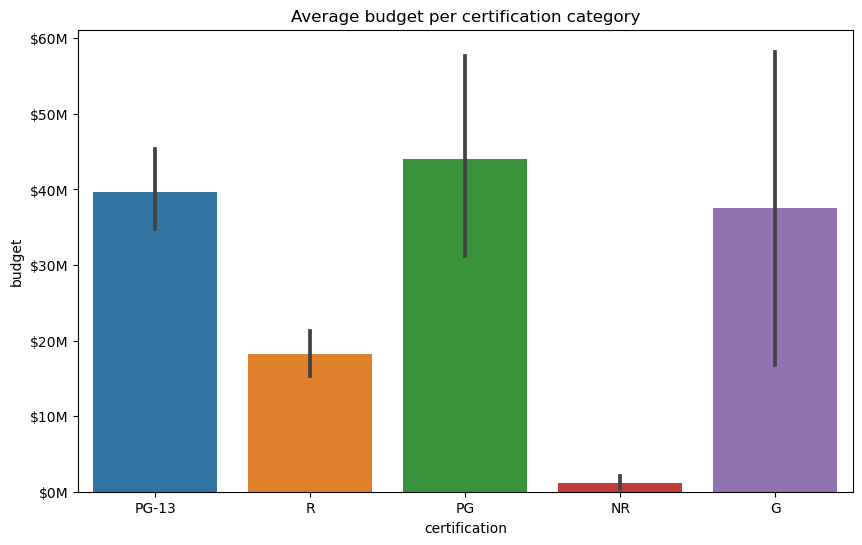

In [19]:
fi,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_financial,x='certification',y='budget')
plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Average budget per certification category')
formatter = FuncFormatter(lambda x, _: f"${int(x / 1e6):,}M")
ax.yaxis.set_major_formatter(formatter);